<a href="https://colab.research.google.com/github/Elinasu001/Data-Analysis-with-Open-Source/blob/main/%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,571 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

- 런타임 -> 세션 다시 시작

In [ ]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 1-2번

In [ ]:
import requests
import json

api_key = "52726d4a68656c6937327048787854"
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5"

data_list = []

for year in range(2015, 2025):  # 2015~2024 반복
    for month in range(1, 13):  # 1~12월 반복
        month_str = f"{month:02d}"

        url = f"{base_url}/{year}/{month_str}"

        try:
            # URL 요청
            response = requests.get(url)

            # 응답 상태 코드 확인
            response.raise_for_status()

            # JSON 데이터 읽기
            data = response.json()

            # '개인' 유형만 필터링
            if 'energyUseDataSummaryInfo' in data and 'row' in data['energyUseDataSummaryInfo']:
                rows = data['energyUseDataSummaryInfo']['row']
                filtered = [row for row in rows if row.get('MM_TYPE') == '개인']

                # 전기, 가스, 수도, 지역난방 사용량만 남김
                if filtered:
                    data_list.append({
                        "YEAR": filtered[0].get("YEAR"),
                        "MON": filtered[0].get("MON"),
                        "MM_TYPE": filtered[0].get("MM_TYPE"),
                        "EUS": filtered[0].get("EUS"),
                        "GUS": filtered[0].get("GUS"),
                        "WUS": filtered[0].get("WUS"),
                        "HUS": filtered[0].get("HUS")
                    })
                    print(f"관련 데이터 저장됨: {year}년 {month}월:", filtered[0])
                else:
                    print(f"관련 데이터 없음: {year}년 {month}월")

        except requests.exceptions.RequestException as e:
            print(f"API 호출 실패: {e}")
        except json.JSONDecodeError as e:
            print(f"JSON 파싱 실패: {e}")

관련 데이터 저장됨: 2015년 1월: {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
관련 데이터 저장됨: 2015년 2월: {'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'CNT': '774620', 'EUS': '189974230', 'EUS1': '193611430', 'EUS2': '200055533', 'ECO2_1': '-6859251.5', 'ECO2_2': '-2908322.636', 'GUS': '56487358', 'GUS1': '59353536', 'GUS2': '66191173', 'GCO2_1': '-6284996.5', 'GCO2_2': '-14078392.16', 'WUS': '12656888.218', 'WUS1': '12713146.172', 'WUS2': '12948410.081', 'WCO2_1': '-173889.9085', 'WCO2_2': '-5

# 2-1번

In [ ]:
import pandas as pd

## 데이터 프레임으로 변환
df = pd.DataFrame(data_list)
df

,YEAR,MON,MM_TYPE,EUS,GUS,WUS,HUS
0,2015,01,개인,193784708,59133720,12819757.886,22740838.937
1,2015,02,개인,189974230,56487358,12656888.218,18793320.213
2,2015,05,개인,177289769,22060892,13086734.214,1320895.801
3,2015,06,개인,186073153,12677645,14241651.402,294312.634
4,2015,07,개인,165114568,8893640,12083879.038,702863.645
...,...,...,...,...,...,...,...
78,2024,08,개인,463971328,7072251,15873544.6,130082.263
79,2024,09,개인,409872908,5729131,15143321.6,3420507.136
80,2024,10,개인,282268119,8233421,15297669.9,2695491.396
81,2024,11,개인,257927956,17418221,14678672.5,8836296.454


# 2-2번

In [ ]:
import pandas as pd

#%reset -f

#  YEAR, MON을 숫자형으로 변환
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MON']  = pd.to_numeric(df['MON'], errors='coerce')


# 계절(season) 구분 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 컬럼 추가
df['SEASON'] = df['MON'].apply(get_season)

# 열이름 변경
df_renamed = df.rename(columns={
    'YEAR': '연도(year)',
    'MON': '월(mon)',
    'SEASON': '계절(season)',
    'MM_TYPE': '유형(type)',
    'EUS': '전기(eus)',
    'GUS': '가스(gus)',
    'WUS': '수도(wus)',
    'HUS': '지역난방(hus)'
})

# 인덱스 연도로 지정
df_renamed.set_index('연도(year)', inplace=True)

# 특정 열 선택
selected_columns = ['월(mon)', '계절(season)', '유형(type)', '전기(eus)', '가스(gus)', '수도(wus)', '지역난방(hus)']

# 선택된 열만 출력
df_renamed[selected_columns]


,월(mon),계절(season),유형(type),전기(eus),가스(gus),수도(wus),지역난방(hus)
연도(year),,,,,,,
2015,1,겨울,개인,193784708,59133720,12819757.886,22740838.937
2015,2,겨울,개인,189974230,56487358,12656888.218,18793320.213
2015,5,봄,개인,177289769,22060892,13086734.214,1320895.801
2015,6,여름,개인,186073153,12677645,14241651.402,294312.634
2015,7,여름,개인,165114568,8893640,12083879.038,702863.645
...,...,...,...,...,...,...,...
2024,8,여름,개인,463971328,7072251,15873544.6,130082.263
2024,9,가을,개인,409872908,5729131,15143321.6,3420507.136
2024,10,가을,개인,282268119,8233421,15297669.9,2695491.396


In [ ]:
# CSV 형식 데이터 저장
df.to_csv('energy_analysis.csv', encoding='utf-8', index=False)

# 3-1번

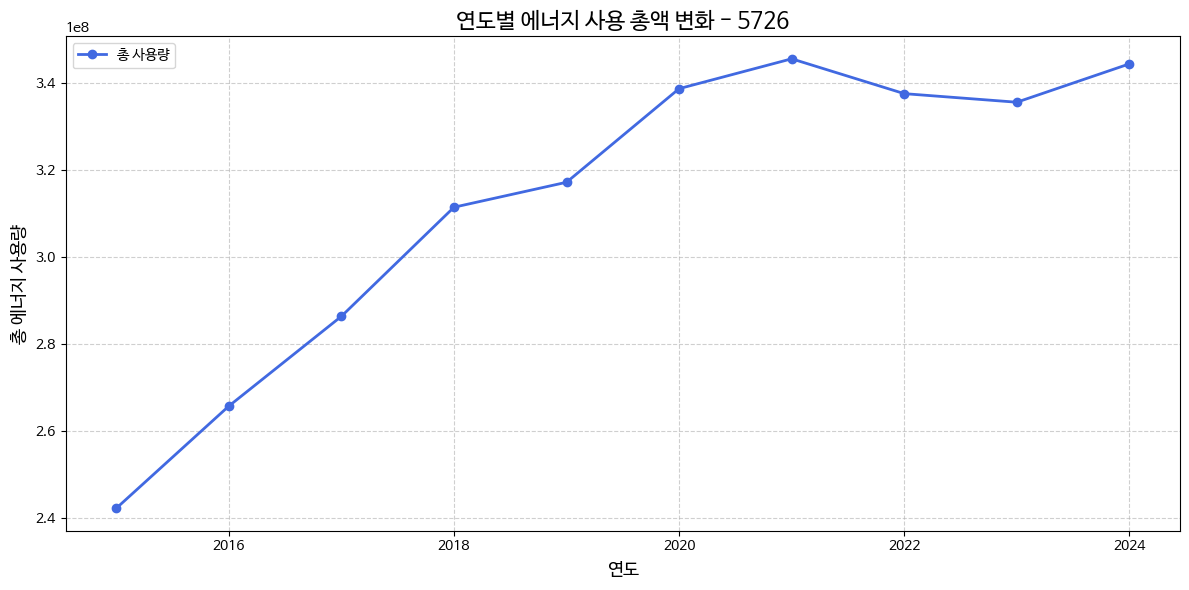

In [ ]:
import matplotlib.font_manager as fm

# 에너지 사용량을 숫자형으로 변환
cols_to_numeric = ['전기(eus)', '가스(gus)', '수도(wus)', '지역난방(hus)']
for col in cols_to_numeric:
    # 기존 코드와 동일하지만, 변환 불가한 값이 NaN이 되므로 이후 fillna 처리 필요
    df_renamed[col] = pd.to_numeric(df_renamed[col], errors='coerce')

#  NaN 값이 있으면 0으로 대체 (안정성 보완)
df_renamed[cols_to_numeric] = df_renamed[cols_to_numeric].fillna(0)

# 연도별 총 사용량 계산 (전기 + 가스 + 수도 + 지역난방)
df_renamed['총사용량(total_use)'] = df_renamed[cols_to_numeric].sum(axis=1)

# 연도별 평균값(12개월 합계 평균) 계산
yearly_total = df_renamed.groupby(df_renamed.index)['총사용량(total_use)'].mean()

#  데이터 타입/결측치 확인 (디버깅용)
# print(yearly_total.head())       # 데이터 확인
# print(df_renamed.isnull().sum()) # 결측치 검증

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_total.index, yearly_total.values,
         marker='o', linestyle='-', linewidth=2, color='royalblue', label='총 사용량')

plt.title("연도별 에너지 사용 총액 변화 - 5726", fontsize=16)
plt.xlabel("연도", fontsize=13)
plt.ylabel("총 에너지 사용량", fontsize=13)

# 그래프 보완: 격자선 + 범례 + 여백 조정
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()

# 그래프 저장
plt.savefig("energy_usage_trend_5726.png", dpi=300, bbox_inches='tight')
plt.show()

# 3-2 번

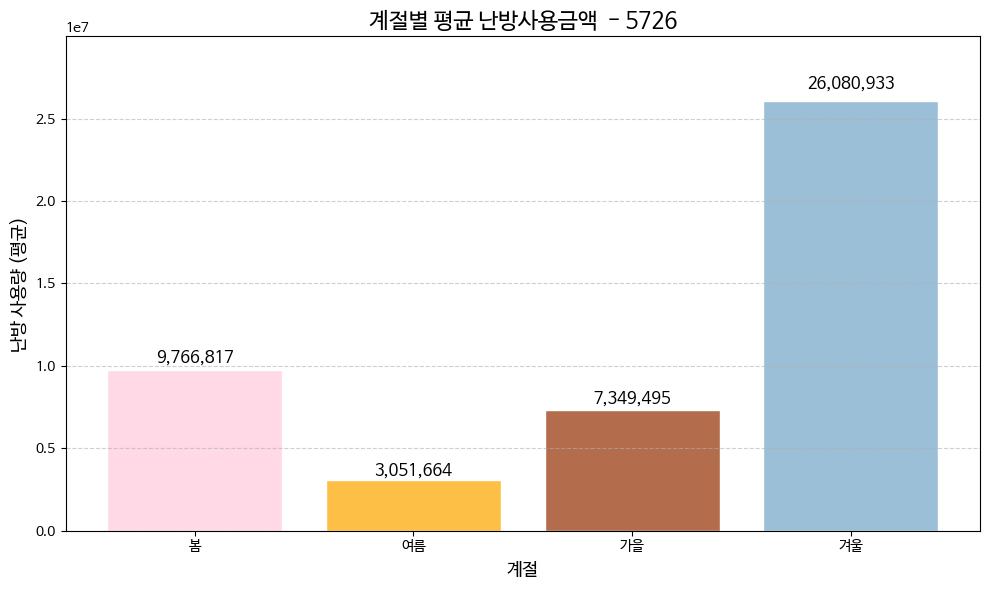

In [ ]:
# 계절별 가스 사용량 평균 계산

season_order = ['봄', '여름', '가을', '겨울']
seasonal_heating = df_renamed.groupby('계절(season)')['지역난방(hus)'].mean().reindex(season_order)

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_heating.index, seasonal_heating.values,
               color=['#FFD9E5','#FDBF46' ,'#B36D4C' , '#9BBFD7'],
               edgecolor='white', linewidth=1)

# 제목, 축 레이블 설정
plt.title("계절별 평균 난방사용금액  - 5726", fontsize=16)
plt.xlabel("계절", fontsize=13)
plt.ylabel("난방 사용량 (평균)", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)

#  각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (height * 0.02),
             f'{height:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

plt.ylim(0, seasonal_heating.max() * 1.15)

# 그래프 여백 조정 및 저장
plt.tight_layout()
plt.savefig("seasonal_heating_usage_5726.png", dpi=300, bbox_inches='tight')
plt.show()

# 4번

## 연도별  에너지 사용 총량 변화 트렌드 분석

분석한 시각화된 그래프를 보면 2015년부터 2024년까지 개인 가구의 연평균 총 에너지 사용량이 꾸준하게 증가하는 추세를 명확하게 볼 수 있습니다.

특히 2020년 기점으로 상승세가 더욱 두드러지며, 2021년 이후 급격한 증가를 보이다가 최근 연도로 올수록 높은 소비량 수준을 유지하는 패턴이 보입니다.

이러한 트렌드의 원인은 다음과 같이 추론할 수 있습니다.

1. 이상 기후의 심화
최근 몇 년간 데이터에서 여름철 전기 사용량이 폭발적으로 증가한 것은 폭염으로 인한 냉방 수요 급증이 주된 원인으로 보입니다. 마찬가지로 겨울철 한파는 가스와 지역난방 사용량을 늘려 전체적인 에너지 소비량 증가를 이끌었을 것입니다.

2. 생활 패턴의 변화(코로나 19 팬데믹 이후)
2020년부터 나타나는 뚜렷한 상승세는 코로나 19 팬데믹으로 인해 재택근무, 원격 수업 등 집에서 머무는 시간이 길어진 생활 패턴의 변화가 큰 영향을 미쳤을 가능성이 있습니다. 이러한 변화가 에너지 소비 습관을바꾸고, 팬데믹 이후에도 일부 유지되며 높은 소비량의 원인이 된 것으로 분석됩니다.